In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer

In [23]:
## first we read the dataset

df = pd.read_csv("concrete_data.csv")
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [24]:
## no missing values as they dont work with transformers

df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [25]:
X = df.drop(columns = ["Strength"])
y = df["Strength"]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

C:\Users\Prakhar Rustagi\AppData\Local\Temp\ipykernel_48636\2043497757.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\Prakhar Rustagi\AppData\Local\Temp\ipykernel_48636\2043497757.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\Prakhar Rusta

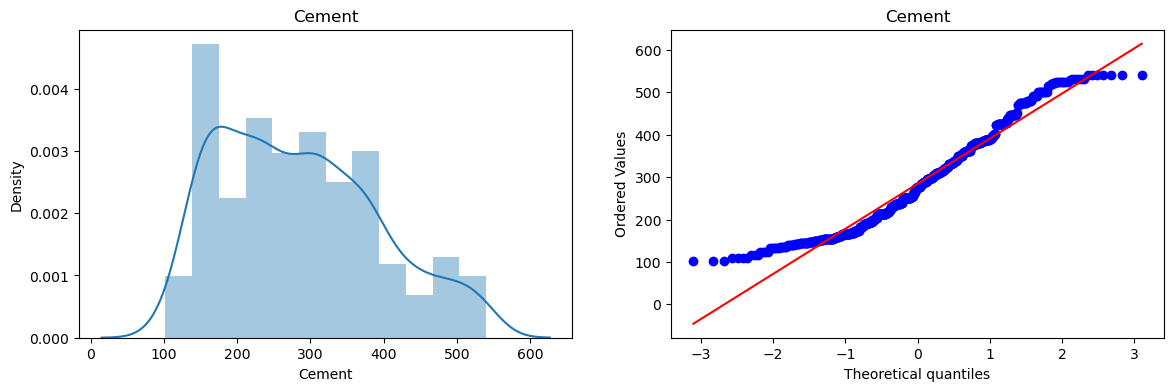

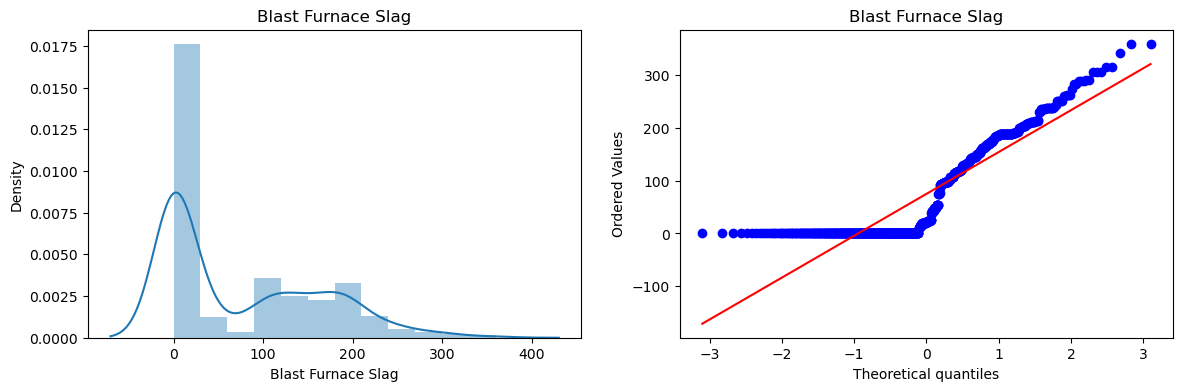

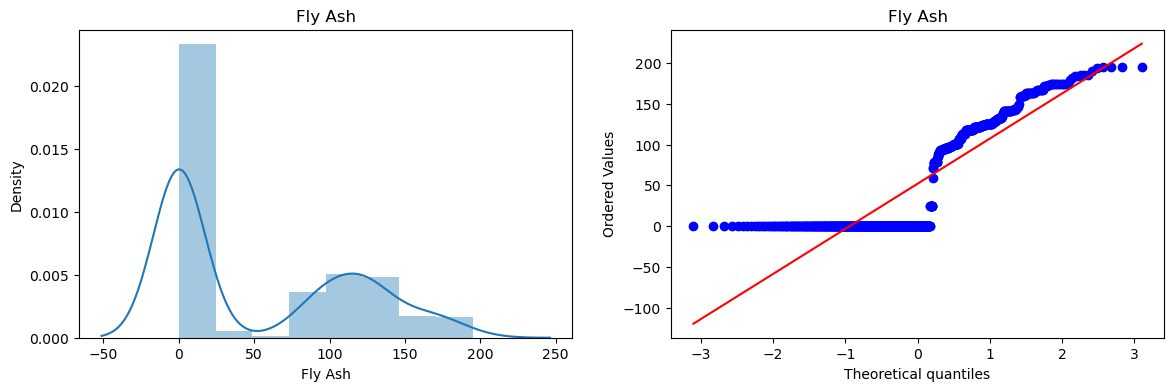

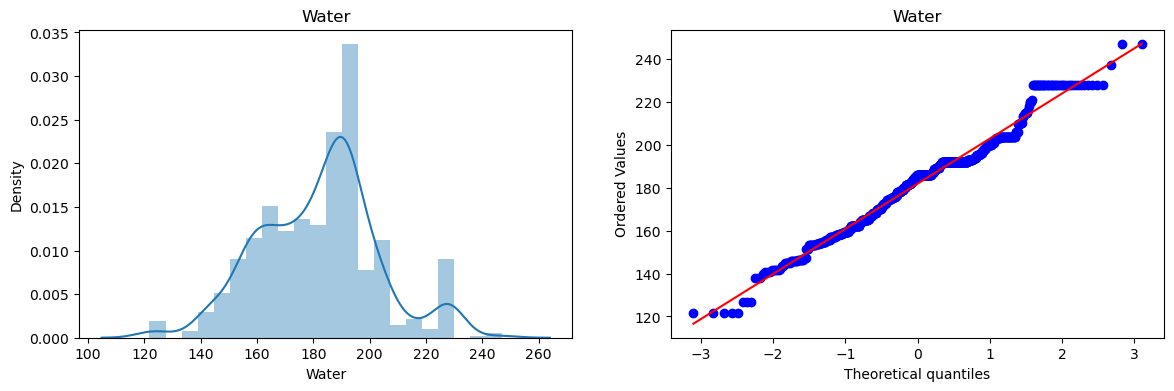

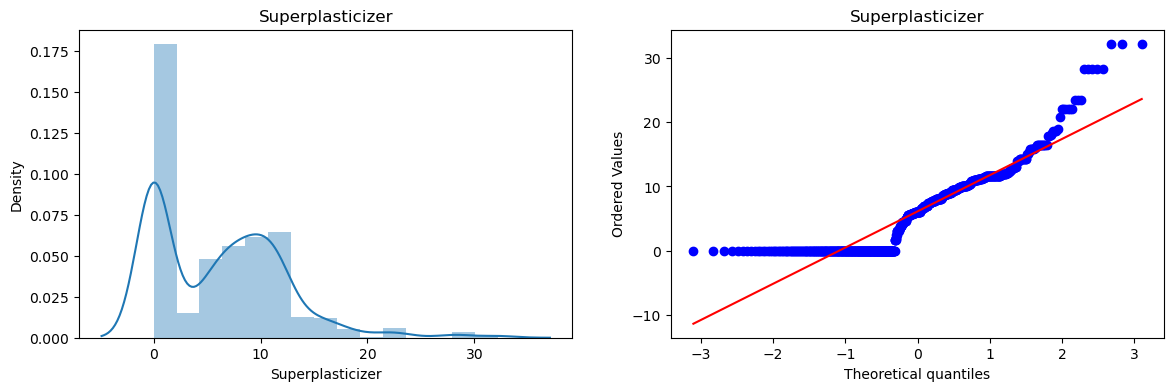

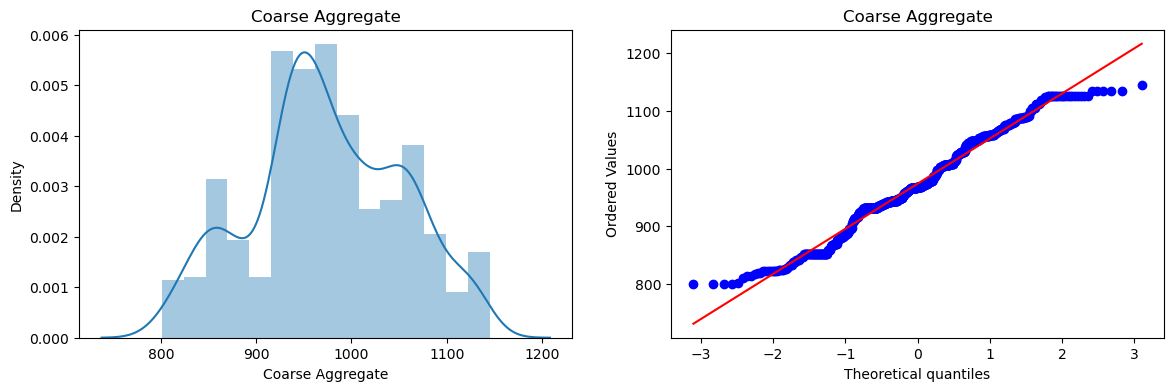

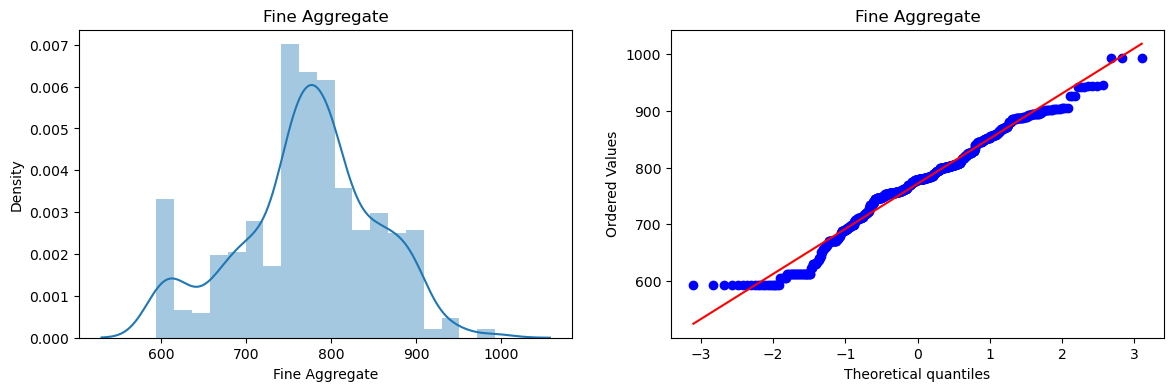

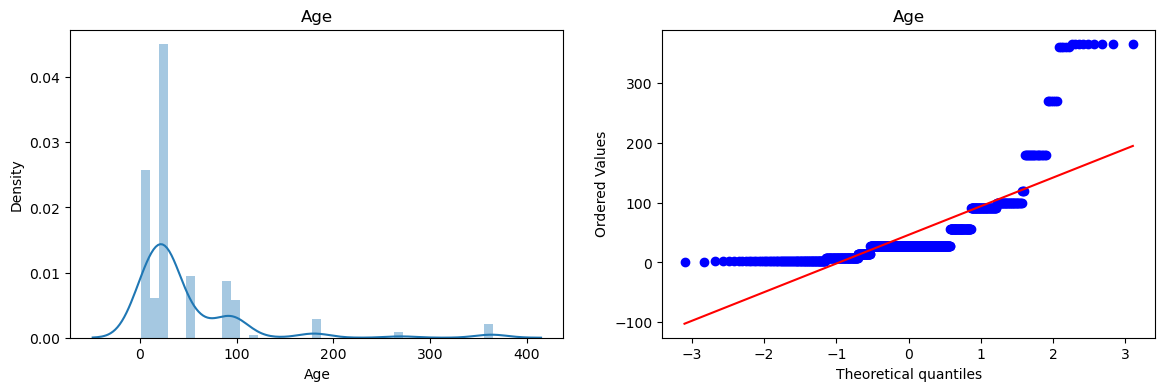

In [27]:
## lets see the distributions of all variables

for col in X.columns:
    plt.figure(figsize = (14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)
    
    plt.subplot(122)
    stats.probplot(X_train[col], dist = "norm", plot=plt)
    plt.title(col)

In [28]:
model = LinearRegression()
model.fit(X_train,y_train)

predictions = model.predict(X_test)

r2_score(predictions,y_test)

0.31294117312803826

In [31]:
## this is the performance average withour using the power transformer 
cross_val_score(model, X_train, y_train, cv = 10).mean()

0.5922553924067174

##POWER TRANSFORMER

In [48]:
X = df.drop(columns = ["Strength"])
y = df["Strength"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

transformer1 = PowerTransformer()
# transformer1 = PowerTransformer(method ="box-cox")

X_train_transformed = transformer1.fit_transform(X_train)
X_test_transformed= transformer1.transform(X_test)

## to visualize the lambdas selected
lambdas = pd.DataFrame(transformer1.lambdas_,X_train.columns)
lambdas

,0
Cement,0.190881
Blast Furnace Slag,0.015328
Fly Ash,-0.183831
Water,0.852513
Superplasticizer,0.226618
Coarse Aggregate,1.040395
Fine Aggregate,1.891786
Age,0.025134


In [34]:
model = LinearRegression()
model.fit(X_train_transformed,y_train)

predictions = model.predict(X_test_transformed)

r2_score(predictions,y_test)

0.743428454328823

In [37]:
## this is the performance average withour using the power transformer 
cross_val_score(model, X_train_transformed, y_train, cv = 10).mean()

0.7918300100923918

C:\Users\Prakhar Rustagi\AppData\Local\Temp\ipykernel_48636\1534154793.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])
C:\Users\Prakhar Rustagi\AppData\Local\Temp\ipykernel_48636\1534154793.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col]

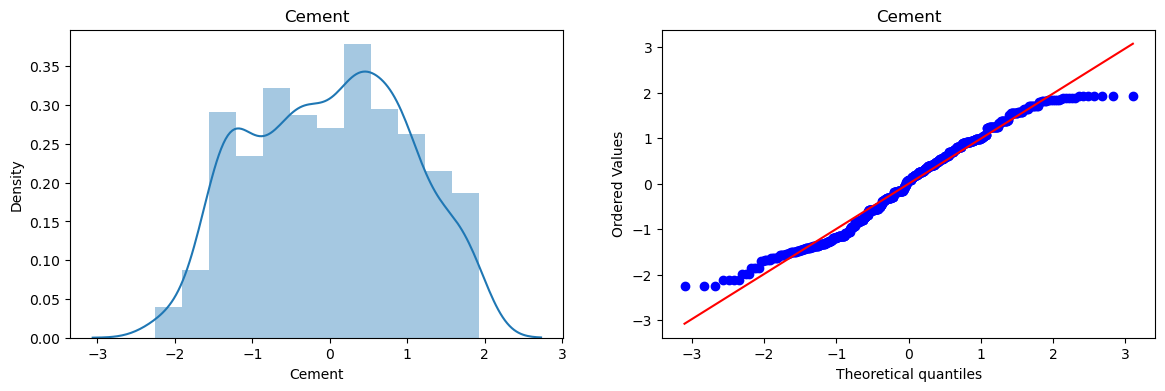

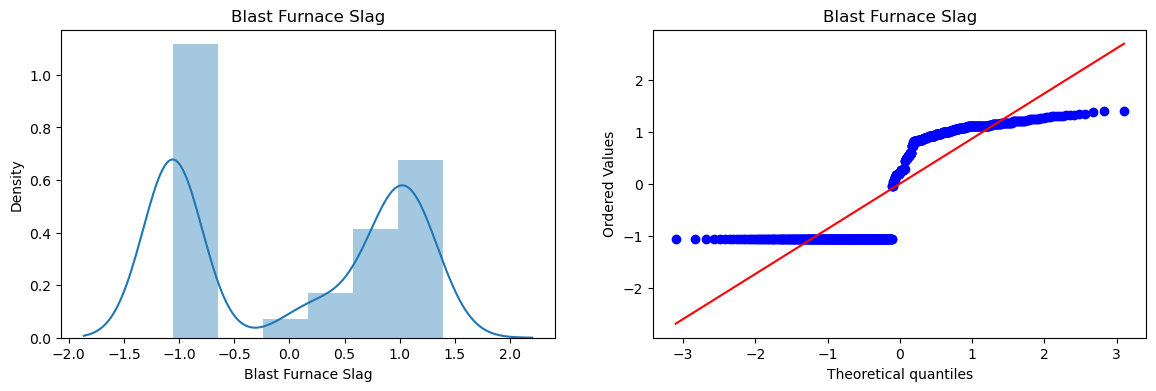

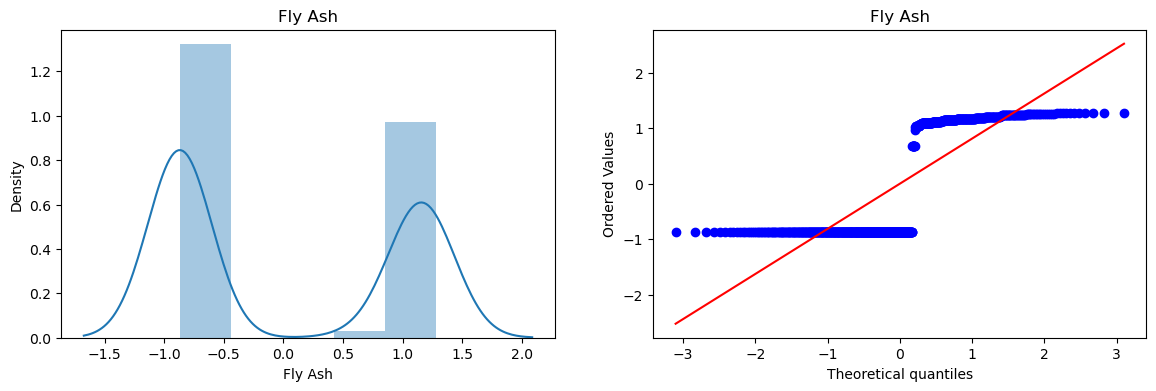

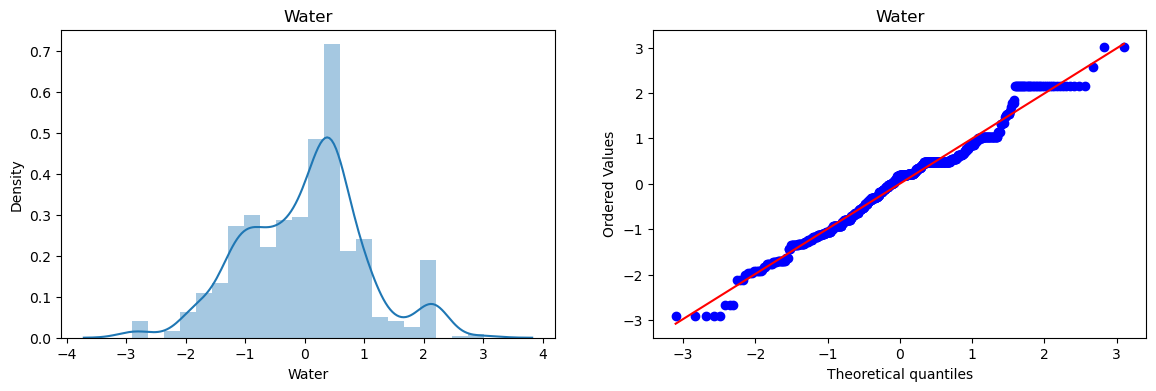

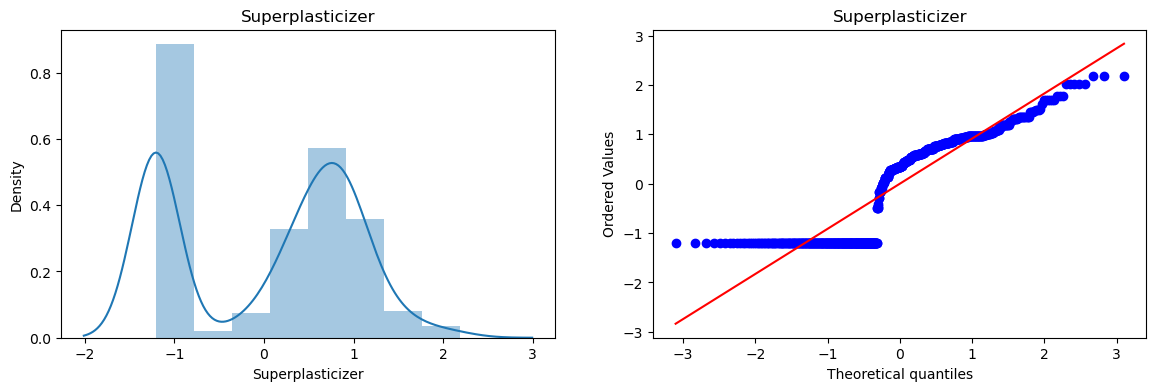

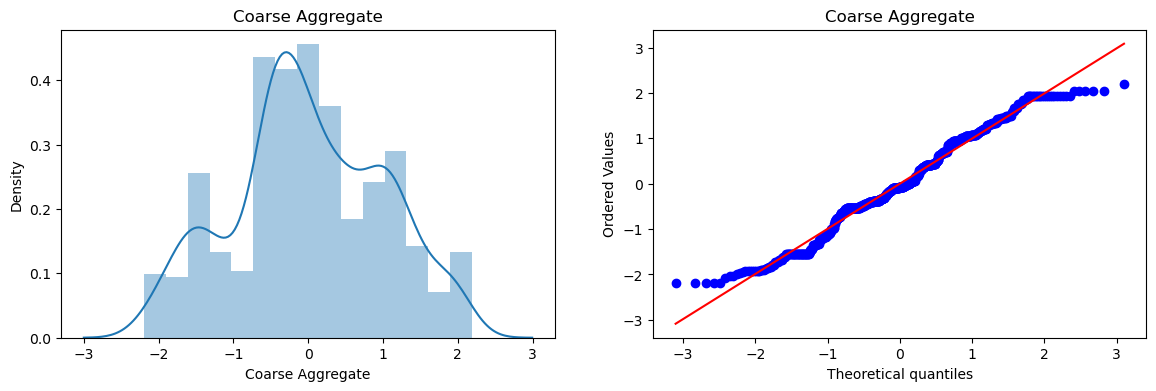

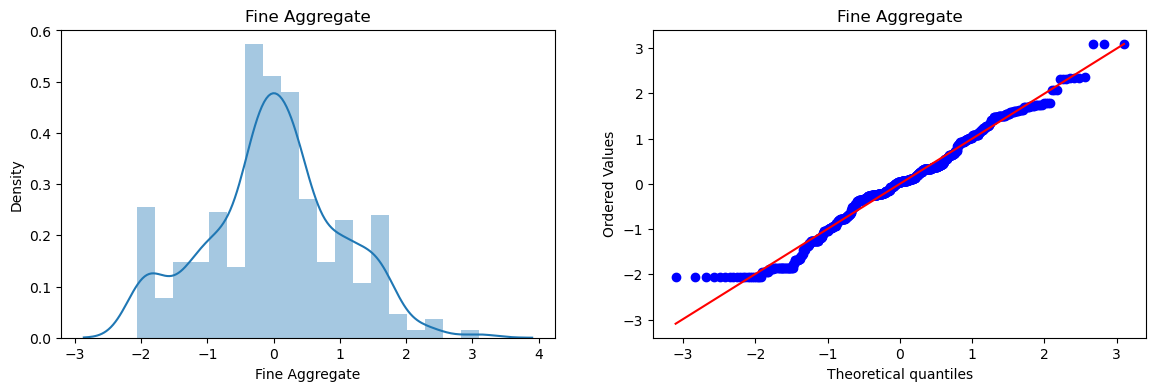

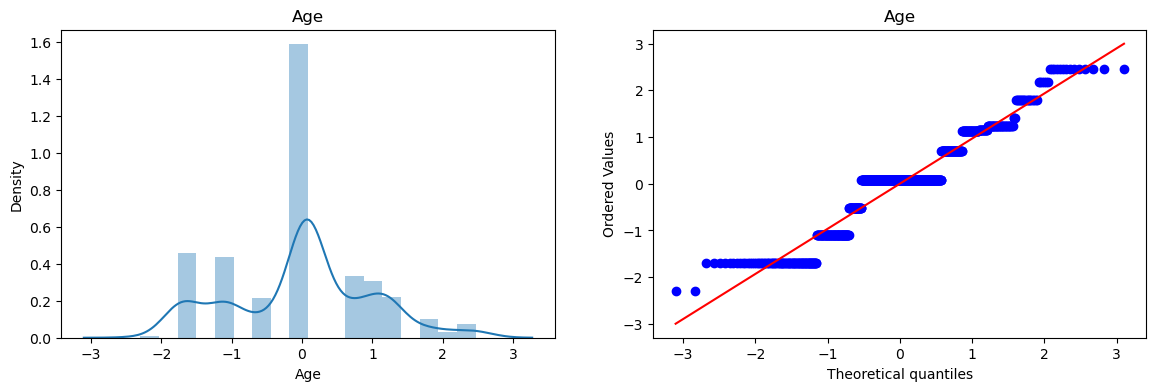

In [43]:
## lets see the distributions of all variables

## converted from numpy array tp dataframe as it is needed for plotting ..cannot plot X_train_transformed[col]
X_train_transformed = pd.DataFrame(X_train_transformed, columns = X_train.columns)

for col in X.columns:
    plt.figure(figsize = (14,4))
    plt.subplot(121)
    sns.distplot(X_train_transformed[col])
    plt.title(col)
    
    plt.subplot(122)
    stats.probplot(X_train_transformed[col], dist = "norm", plot=plt)
    plt.title(col)

In [42]:
X_train_transformed = pd.DataFrame(X_train_transformed, columns = X_train.columns)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,-0.793093,-1.058122,1.114033,-0.762516,0.542379,0.414249,1.779195,0.070018
1,0.504670,-1.058122,-0.868937,0.112153,-1.206559,1.137548,0.097634,-1.089470
2,0.453516,1.167725,-0.868937,-1.238962,1.190829,-1.548958,1.412397,-1.698165
3,0.771969,0.162478,1.202744,-1.321216,0.902977,-0.406726,0.330264,-1.698165
4,-1.228135,1.119626,1.215014,-0.124204,1.516252,-1.727678,-0.426811,0.070018
...,...,...,...,...,...,...,...,...
716,0.171431,1.143586,-0.868937,-1.773596,0.930768,0.391273,0.365564,-1.698165
717,-0.208521,-1.058122,1.171993,-1.842059,1.002378,1.442161,0.328958,-0.528206
718,-0.848032,-1.058122,1.172201,-0.714626,0.806241,1.342300,0.302881,1.229840
719,1.552308,0.919050,-0.868937,-0.024818,0.702378,-1.548958,0.078461,0.070018
